In [ ]:
### needed if running in docker
# import sys
# sys.path.append("../")

In [2]:
import json 
from master_thesis import utils
from master_thesis.models.u_flp_2e import UFLPD2E
import logging
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time
from master_thesis.blockchain_proof_of_work_flp.bpw_2e_flp import BlockchainFLP2E, BPWFLP2ESettings

In [3]:
# import logging
# logger = logging.getLogger()
# logger.setLevel(logging.DEBUG)
# logging.debug("test")

In [4]:
number_of_facilities =20
number_of_customers = 200
number_of_factories =5
distance_matrix, coordinates =  utils.get_random_distance_matrix_coordinates(number_of_facilities+number_of_customers + number_of_factories)

fix_costs_facilities = np.random.rand(number_of_facilities)
fix_costs_factories = np.random.rand(number_of_factories)

input_data_flp = {
    "number_of_facilities": number_of_facilities,
    "number_of_customers": number_of_customers,
    "number_of_factories": number_of_factories,
    "distance_matrix": distance_matrix.values.tolist(),
    "fix_costs_facilities": fix_costs_facilities.tolist(),
    "fix_costs_factories": fix_costs_factories.tolist(),
}

In [5]:
start_b = time.time()
settings_bch = BPWFLP2ESettings(max_iter = 20000,
                              max_iter_mining = 1000,
                              early_stopping_num_blocks = 200,
                              num_of_transactions_per_block = 40,
                              early_stopping_improvement = 0.001,
                              max_invalid_blocks_in_row = 2000,
                              num_halvings = 40,
                              halving_coef = 0.5, 
                              multi_node = False,
                              num_of_nodes = 10,
                             )
blockchain = BlockchainFLP2E(json.dumps(input_data_flp), settings_bch)
blockchain.solve()
end_b = time.time()
print(end_b - start_b)

225.96304869651794


In [6]:
start = time.time()
prec = UFLPD2E(json.dumps(input_data_flp))
prec.compute()
end = time.time()
print(end - start)

0.7037453651428223


In [7]:
print(prec.model.objective_value)

36.06227077359465


In [8]:
print(blockchain.chain[-1].new_value)
print(1 - prec.model.objective_value/blockchain.chain[-1].new_value)

39.749761863507025
0.09276762720175546


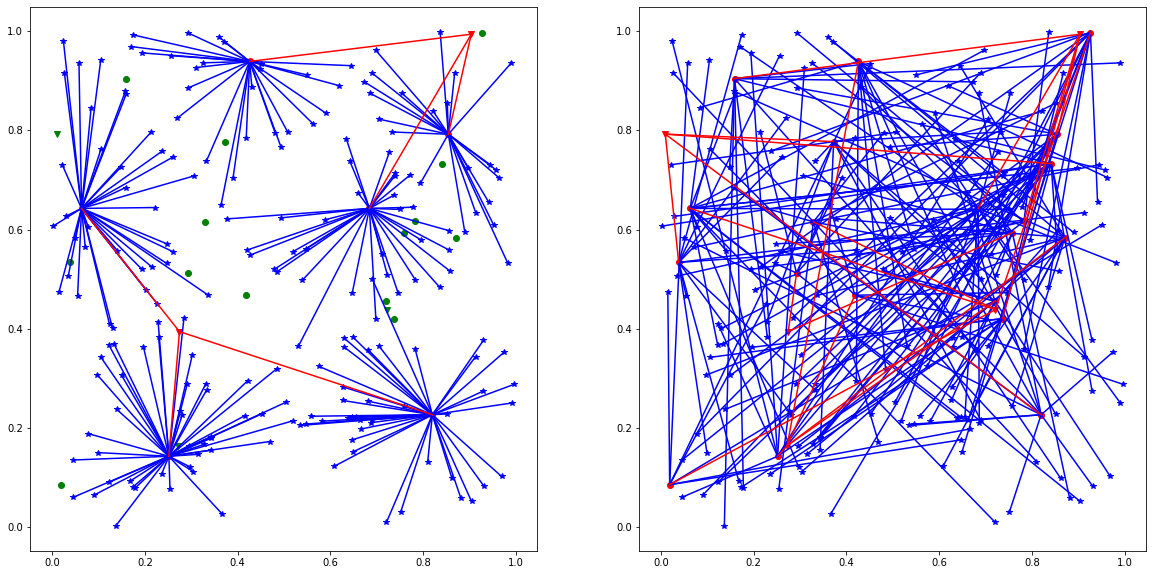

In [9]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i in range(number_of_facilities):
    if blockchain.chain[-1].new_solution.facility_open[i] > 0:
        ax1.plot(coordinates[i+number_of_factories][0],coordinates[i+number_of_factories][1], 'ro' ) 
    else:
        ax1.plot(coordinates[i+number_of_factories][0],coordinates[i+number_of_factories][1], 'go' ) 
        
for i in range(number_of_factories):
    if blockchain.chain[-1].new_solution.factory_open[i] > 0:
        ax1.plot(coordinates[i][0],coordinates[i][1], 'rv' ) 
    else:
        ax1.plot(coordinates[i][0],coordinates[i][1], 'gv' ) 
        
for i in range(number_of_facilities+number_of_factories,number_of_facilities+number_of_customers+number_of_factories):
    ax1.plot(coordinates[i][0],coordinates[i][1], 'b*' ) 
    
for i in range(number_of_customers):
    ax1.plot([coordinates[blockchain.chain[-1].new_solution.customer_allocation[i]+number_of_factories][0],coordinates[i+number_of_facilities+number_of_factories][0]],
             [coordinates[blockchain.chain[-1].new_solution.customer_allocation[i]+number_of_factories][1],coordinates[i+number_of_facilities+number_of_factories][1]],
             'b')
    
for i in range(number_of_facilities):
    if blockchain.chain[-1].new_solution.facility_open[i]:
        ax1.plot([coordinates[blockchain.chain[-1].new_solution.facility_allocation[i]][0],coordinates[i+number_of_factories][0]],
                 [coordinates[blockchain.chain[-1].new_solution.facility_allocation[i]][1],coordinates[i+number_of_factories][1]],
                 'r')

for i in range(number_of_facilities):
    if blockchain.chain[0].new_solution.facility_open[i] > 0:
        ax2.plot(coordinates[i+number_of_factories][0],coordinates[i+number_of_factories][1], 'ro' ) 
    else:
        ax2.plot(coordinates[i+number_of_factories][0],coordinates[i+number_of_factories][1], 'go' ) 
        
for i in range(number_of_factories):
    if blockchain.chain[0].new_solution.factory_open[i] > 0:
        ax2.plot(coordinates[i][0],coordinates[i][1], 'rv' ) 
    else:
        ax2.plot(coordinates[i][0],coordinates[i][1], 'gv' ) 
        
for i in range(number_of_facilities+number_of_factories,number_of_facilities+number_of_customers+number_of_factories):
    ax2.plot(coordinates[i][0],coordinates[i][1], 'b*' ) 
    
for i in range(number_of_customers):
    ax2.plot([coordinates[blockchain.chain[0].new_solution.customer_allocation[i]+number_of_factories][0],coordinates[i+number_of_facilities+number_of_factories][0]],
             [coordinates[blockchain.chain[0].new_solution.customer_allocation[i]+number_of_factories][1],coordinates[i+number_of_facilities+number_of_factories][1]],
             'b')
    
for i in range(number_of_facilities):
    if blockchain.chain[0].new_solution.facility_open[i]:
        ax2.plot([coordinates[blockchain.chain[0].new_solution.facility_allocation[i]][0],coordinates[i+number_of_factories][0]],
                 [coordinates[blockchain.chain[0].new_solution.facility_allocation[i]][1],coordinates[i+number_of_factories][1]],
                 'r')

In [ ]:
optimal_values = [] 
num_of_transactions = []

for ch in range(1,len(blockchain.chain)):
    fig = plt.figure(figsize = (20,10))
    fig.suptitle('Horizontally stacked subplots')
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    for i in range(number_of_facilities):
        if blockchain.chain[ch].new_solution.facility_open[i] > 0:
            ax1.plot(coordinates[i+number_of_factories][0],coordinates[i+number_of_factories][1], 'ro' ) 
        else:
            ax1.plot(coordinates[i+number_of_factories][0],coordinates[i+number_of_factories][1], 'go' ) 

    for i in range(number_of_factories):
        if blockchain.chain[ch].new_solution.factory_open[i] > 0:
            ax1.plot(coordinates[i][0],coordinates[i][1], 'rv' ) 
        else:
            ax1.plot(coordinates[i][0],coordinates[i][1], 'gv' ) 

    for i in range(number_of_facilities+number_of_factories,number_of_facilities+number_of_customers+number_of_factories):
        ax1.plot(coordinates[i][0],coordinates[i][1], 'b*' ) 

    for i in range(number_of_customers):
        ax1.plot([coordinates[blockchain.chain[ch].new_solution.customer_allocation[i]+number_of_factories][0],coordinates[i+number_of_facilities+number_of_factories][0]],
                 [coordinates[blockchain.chain[ch].new_solution.customer_allocation[i]+number_of_factories][1],coordinates[i+number_of_facilities+number_of_factories][1]],
                 'b')

    for i in range(number_of_facilities):
        if blockchain.chain[-1].new_solution.facility_open[i]:
            ax1.plot([coordinates[blockchain.chain[ch].new_solution.facility_allocation[i]][0],coordinates[i+number_of_factories][0]],
                     [coordinates[blockchain.chain[ch].new_solution.facility_allocation[i]][1],coordinates[i+number_of_factories][1]],
                     'r')

    for i in range(number_of_facilities):
        if blockchain.chain[0].new_solution.facility_open[i] > 0:
            ax2.plot(coordinates[i+number_of_factories][0],coordinates[i+number_of_factories][1], 'ro' ) 
        else:
            ax2.plot(coordinates[i+number_of_factories][0],coordinates[i+number_of_factories][1], 'go' ) 

    for i in range(number_of_factories):
        if blockchain.chain[0].new_solution.factory_open[i] > 0:
            ax2.plot(coordinates[i][0],coordinates[i][1], 'rv' ) 
        else:
            ax2.plot(coordinates[i][0],coordinates[i][1], 'gv' ) 

    for i in range(number_of_facilities+number_of_factories,number_of_facilities+number_of_customers+number_of_factories):
        ax2.plot(coordinates[i][0],coordinates[i][1], 'b*' ) 

    for i in range(number_of_customers):
        ax2.plot([coordinates[blockchain.chain[0].new_solution.customer_allocation[i]+number_of_factories][0],coordinates[i+number_of_facilities+number_of_factories][0]],
                 [coordinates[blockchain.chain[0].new_solution.customer_allocation[i]+number_of_factories][1],coordinates[i+number_of_facilities+number_of_factories][1]],
                 'b')

    for i in range(number_of_facilities):
        if blockchain.chain[0].new_solution.facility_open[i]:
            ax2.plot([coordinates[blockchain.chain[0].new_solution.facility_allocation[i]][0],coordinates[i+number_of_factories][0]],
                     [coordinates[blockchain.chain[0].new_solution.facility_allocation[i]][1],coordinates[i+number_of_factories][1]],
                     'r')
        
    optimal_values.append(blockchain.chain[ch].new_value)
    ax3.hlines(prec.model.objective_value, 0,len(blockchain.chain))
    ax3.plot(optimal_values,'b')
    
    num_of_transactions.append(len(blockchain.chain[ch].transaction_combo))
    ax4.plot(num_of_transactions,'b')
    
    display.display(fig)
    display.clear_output(wait=True)
    plt.close()
    #time.sleep(0.0000005)